In [75]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import pylab as pl
import json
import os

s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Evolution of populations drawn under different distributions as the distribution parameters and sample size change

### Binomial B(100,0.5), change sample size

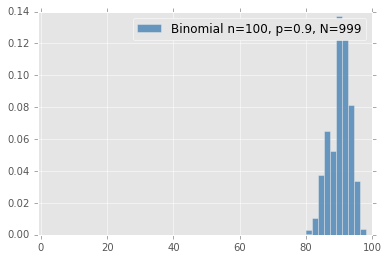

In [158]:
np.random.seed(111)
n = 100
for p in [0.1,0.25,0.5,0.75,0.9]:
    pl.clf()
    pl.hist(np.random.binomial(n, p, 1000), alpha=0.8, 
            label="Binomial n=%d, p=%.1f, N=%d"%(n,p, N),
            color = 'SteelBlue', normed = True)
    pl.xlim(-1,100)
    #pl.ylim(0,0.8)
    pl.legend()
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    


### Poisson distribution, changing different lambda

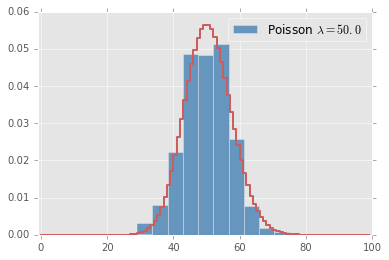

In [162]:

from scipy.stats import poisson

np.random.seed(111)
for lmbd in [1,5,10,25,50]:
    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label=r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-1,100)
    #pl.ylim(0,0.8)
    pl.legend()
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
#overplot the theoretical distribution: the pmf
x = range(0,100) 
##the next line of code is complicated: I want the distribution to be plotted with steps
##this indicates that the distribution is NOT DEFINED for non integer values of x
pl.plot(np.array([[xx,xx] for xx in x]).flatten()[1:], 
        np.array([[poisson.pmf(xx, lmbd),poisson.pmf(xx, lmbd)] for xx in x]).flatten()[:-1], 
        '-', color='IndianRed')
display.display(pl.gcf())
display.clear_output(wait=True)    


### Gaussian distribution N(0,1), changing sample size

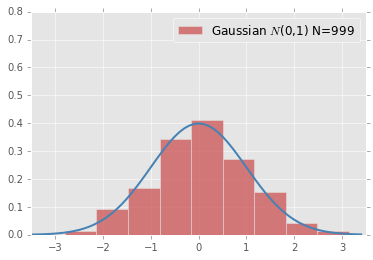

In [163]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

np.random.seed(111)
for n in [10,50,100,500,1000]:
    
    pl.clf()
    pl.hist(np.random.randn(n), color = 'IndianRed', 
            normed = True, alpha=0.8,
            label=r"Gaussian $N$(0,1) N=%d"%(N))
    pl.xlim(-3.5,3.5)
    pl.ylim(0,0.8)
    pl.legend()
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
#overplot the theoretical distribution: the pmf
x = np.arange(-3.5,3.5,0.1) 
pl.plot(x, gaussian(x, 0, 1), color='SteelBlue')
display.display(pl.gcf())
display.clear_output(wait=True)

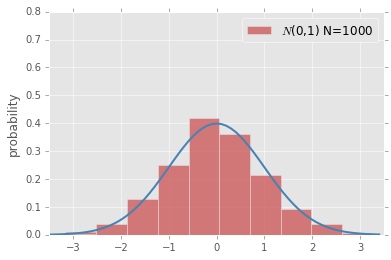

In [110]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
matplotlib.style.use('ggplot')

np.random.seed(111)
for n in [1000]:
    
    pl.clf()
    pl.hist(np.random.randn(n), color = 'IndianRed', 
            normed = True, alpha=0.8,
            label=r"$N$(0,1) N=%d"%(N))
    pl.xlim(-3.5,3.5)
    pl.ylim(0,0.8)
    pl.legend()
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
#overplot the theoretical distribution: the pmf
x = np.arange(-3.5,3.5,0.1) 
pl.plot(x, gaussian(x, 0, 1), color='SteelBlue')
display.display(pl.gcf())
display.clear_output(wait=True)

pl.ylabel("probability")

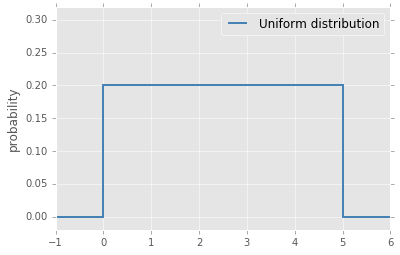

In [122]:
x = np.arange(0,5.1,0.1) 
pl.plot(x, [0.2]*len(x), color='SteelBlue', label="Uniform distribution")
display.display(pl.gcf())
display.clear_output(wait=True)
pl.xlim(-1, 6)
pl.plot([-1,0], [0,0], color='SteelBlue')
pl.plot([5,6], [0,0], color='SteelBlue')
pl.plot([0,0], [0,0.2], color='SteelBlue')
pl.plot([5,5], [0,0.2], color='SteelBlue')
pl.ylabel("probability")
pl.ylim(-0.02,0.32)
pl.legend()

## Central Limit Theorem demonstration with binomial distribution

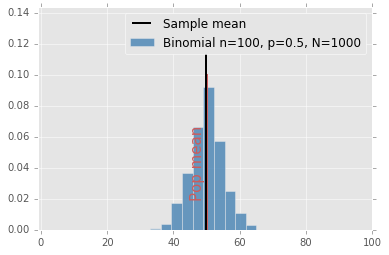

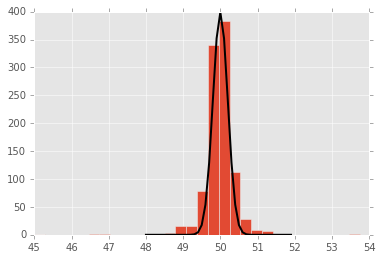

In [153]:
np.random.seed(111)
n = 100
p = 0.5
for N in [3,10,20,50,100,200,500,1000]:
    pl.clf()
    pl.plot()
    sample = np.random.binomial(n, p, N)
    
    pl.hist(sample, alpha=0.8, 
            label="Binomial n=%d, p=%.1f, N=%d"%(n, p, N),
            color = 'SteelBlue', normed = True)
    
    pl.xlim(-1,100)
    #pl.ylim(0,0.8)
    pl.plot([100*0.5, 100*0.5], [0, pl.ylim()[1]], "IndianRed")
    pl.plot([sample.mean(), sample.mean()], [0, pl.ylim()[1]], "k",
           label = "Sample mean")
    pl.text(100*0.45, pl.ylim()[1]*0.5, "Pop mean", rotation=90,
           color="IndianRed", fontsize=15)
    pl.legend()
    pl.ylim(0, pl.ylim()[1]*1.2)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

    
binmeans = [np.random.binomial(n, p, N).mean() for N in np.arange(1,1000)]
pl.figure()
patch = pl.hist(binmeans, bins=30, label = "Distribution of means")
pl.plot(np.arange(48, 52, 0.1), 
        gaussian(np.arange(48, 52, 0.1), n*p, 0.2)*200, 'k')
    

## Poisson Distribution approaches Gaussian for large $lambda$, with mean lamdba & stdev lambda

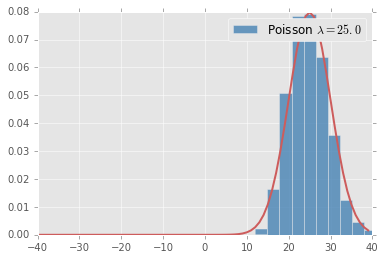

In [173]:
from scipy.stats import poisson

np.random.seed(111)
for lmbd in [1, 2, 3, 5, 10, 25]:
    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label=r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-40,40)
    #pl.ylim(0,0.8)
    pl.legend()
    time.sleep(1)
    
    #overplot the theoretical distribution: the pmf
    x = np.arange(-40,40,1) 
    pl.plot(x, gaussian(x, lmbd, np.sqrt(lmbd)), color='IndianRed', 
            label = r"$N$(%d,%.2f)"%(lmbd, np.sqrt(lmbd)))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
